# 2022 NZMSA Data Science Submission.

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

# Exploratory Data Analysis.

In [2]:
dataset = pd.read_csv("weather-data.csv")
dataset.head() # Show the first five results.

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [3]:

print(dataset.info()) ##this is to check if there is anything in the data we have to clean.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0    station        103713 non-null  object 
 1   valid           103713 non-null  object 
 2   tmpc            103678 non-null  float64
 3   dwpc            103678 non-null  float64
 4   relh            103593 non-null  float64
 5   sknt            103704 non-null  float64
 6   gust            1203 non-null    float64
 7   peak_wind_drct  0 non-null       float64
dtypes: float64(6), object(2)
memory usage: 6.3+ MB
None


In [4]:
dataset.isnull().sum()

 station               0
valid                  0
tmpc                  35
dwpc                  35
relh                 120
sknt                   9
gust              102510
peak_wind_drct    103713
dtype: int64

We can see that peak_wind_drct has 0 non null values, that is all values are null, so we can delete this column from the dataset.
we can also see that there are only 1203 values recorded for gust, will keep it in for now to see dataset general stats.

In [5]:
dataset = dataset.drop('peak_wind_drct', axis=1)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0    station  103713 non-null  object 
 1   valid     103713 non-null  object 
 2   tmpc      103678 non-null  float64
 3   dwpc      103678 non-null  float64
 4   relh      103593 non-null  float64
 5   sknt      103704 non-null  float64
 6   gust      1203 non-null    float64
dtypes: float64(5), object(2)
memory usage: 5.5+ MB
None


In [6]:
print(dataset.describe())

                tmpc           dwpc           relh           sknt         gust
count  103678.000000  103678.000000  103593.000000  103704.000000  1203.000000
mean       15.811503      12.115772      79.782307       8.919029    30.962594
std         4.235197       3.738005      12.562199       5.348379     6.319510
min         2.000000      -2.000000      29.230000       0.000000    13.000000
25%        13.000000       9.000000      71.450000       5.000000    27.000000
50%        16.000000      12.000000      81.990000       8.000000    31.000000
75%        19.000000      15.000000      88.180000      12.000000    35.000000
max        29.000000      23.000000     100.000000      42.000000    56.000000


From the description of the dataset above, we can see that for tmpc, 
the mean is 15.81 with a standard deviation of 4.24 and an interquatile range between 13.0 and 19.0.

For dwpc 
the mean is 12.11 with a standard deviation of 3.73 and an interquatile range between 9.0 and 15.0.

For relh 
the mean is  79.78 with a standard deviation of 12.56 and an interquatile range between 71.45  and 88.18.

For  sknt the mean is 8.92  with a standard deviation of 5.35 and an interquatile range between 5.0 and 12.0.

For gust 
the mean is 30.96 with a standard deviation of 6.32 and an interquatile range between 27.0 and 56.0.


It seems that a lot of the data was taken at the same station, will now run code to check.

In [7]:
dataset[' station'].unique()

array(['NZAA'], dtype=object)

The only unique entry is NZAA and so we can delete the column

In [8]:
dataset = dataset.drop(' station', axis=1)
dataset.head()

,valid,tmpc,dwpc,relh,sknt,gust
0,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN
1,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN
2,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN
3,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN
4,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN


Now we're going to process the date column, we expect a cyclical pattern for weather over years and months and time of day and so we're going to split it as such.

First we're going to see what the type of the column is.

In [9]:
dataset[['year','month','day']] = dataset.valid.str.split('-',expand=True)




In [10]:
dataset = dataset.drop('valid', axis=1)
dataset.head()

,tmpc,dwpc,relh,sknt,gust,year,month,day
0,21.0,11.0,52.77,15.0,NaN,2015,01,01 00:00
1,21.0,10.0,49.37,16.0,NaN,2015,01,01 00:30
2,21.0,12.0,56.38,16.0,NaN,2015,01,01 01:00
3,21.0,13.0,60.21,16.0,NaN,2015,01,01 01:30
4,21.0,12.0,56.38,16.0,NaN,2015,01,01 02:00


In [11]:

dataset[["dayNumber","time"]] = dataset.day.str.split(" ",expand=True)
dataset.head()

,tmpc,dwpc,relh,sknt,gust,year,month,day,dayNumber,time
0,21.0,11.0,52.77,15.0,NaN,2015,01,01 00:00,01,00:00
1,21.0,10.0,49.37,16.0,NaN,2015,01,01 00:30,01,00:30
2,21.0,12.0,56.38,16.0,NaN,2015,01,01 01:00,01,01:00
3,21.0,13.0,60.21,16.0,NaN,2015,01,01 01:30,01,01:30
4,21.0,12.0,56.38,16.0,NaN,2015,01,01 02:00,01,02:00


In [12]:
dataset = dataset.drop('day', axis=1)
dataset.head()

,tmpc,dwpc,relh,sknt,gust,year,month,dayNumber,time
0,21.0,11.0,52.77,15.0,NaN,2015,01,01,00:00
1,21.0,10.0,49.37,16.0,NaN,2015,01,01,00:30
2,21.0,12.0,56.38,16.0,NaN,2015,01,01,01:00
3,21.0,13.0,60.21,16.0,NaN,2015,01,01,01:30
4,21.0,12.0,56.38,16.0,NaN,2015,01,01,02:00


In [13]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   tmpc       103678 non-null  float64
 1   dwpc       103678 non-null  float64
 2   relh       103593 non-null  float64
 3   sknt       103704 non-null  float64
 4   gust       1203 non-null    float64
 5   year       103713 non-null  object 
 6   month      103713 non-null  object 
 7   dayNumber  103713 non-null  object 
 8   time       103713 non-null  object 
dtypes: float64(5), object(4)
memory usage: 7.1+ MB
None


now to conver the year month day and time to integers, will convers time to time in minutes with 2359 being 1439.

In [14]:
dataset["year"] = dataset["year"].astype("int64")
dataset["month"] = dataset["month"].astype("int64")
dataset["dayNumber"] = dataset["dayNumber"].astype("int64")

print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   tmpc       103678 non-null  float64
 1   dwpc       103678 non-null  float64
 2   relh       103593 non-null  float64
 3   sknt       103704 non-null  float64
 4   gust       1203 non-null    float64
 5   year       103713 non-null  int64  
 6   month      103713 non-null  int64  
 7   dayNumber  103713 non-null  int64  
 8   time       103713 non-null  object 
dtypes: float64(5), int64(3), object(1)
memory usage: 7.1+ MB
None


In [15]:
dataset["time"]= (dataset.time.str.split(":",expand=True)[0]).astype("int64")*60 +(dataset.time.str.split(":",expand=True)[1].astype("int64"))

dataset.head()

,tmpc,dwpc,relh,sknt,gust,year,month,dayNumber,time
0,21.0,11.0,52.77,15.0,NaN,2015,1,1,0
1,21.0,10.0,49.37,16.0,NaN,2015,1,1,30
2,21.0,12.0,56.38,16.0,NaN,2015,1,1,60
3,21.0,13.0,60.21,16.0,NaN,2015,1,1,90
4,21.0,12.0,56.38,16.0,NaN,2015,1,1,120


In [16]:
print(dataset.info())
dataset.rename(columns = {'dayNumber':'day'}, inplace = True)
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   tmpc       103678 non-null  float64
 1   dwpc       103678 non-null  float64
 2   relh       103593 non-null  float64
 3   sknt       103704 non-null  float64
 4   gust       1203 non-null    float64
 5   year       103713 non-null  int64  
 6   month      103713 non-null  int64  
 7   dayNumber  103713 non-null  int64  
 8   time       103713 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 7.1 MB
None


,tmpc,dwpc,relh,sknt,gust,year,month,day,time
0,21.0,11.0,52.77,15.0,NaN,2015,1,1,0
1,21.0,10.0,49.37,16.0,NaN,2015,1,1,30
2,21.0,12.0,56.38,16.0,NaN,2015,1,1,60
3,21.0,13.0,60.21,16.0,NaN,2015,1,1,90
4,21.0,12.0,56.38,16.0,NaN,2015,1,1,120


We should expect cyclic weather across the year because of the seasons and also in minutes because similar times should have similar weather. But we can combine month and day for just a day in the month.

In [17]:

def month_to_days(month):
    if month ==1:
        return 0
    elif month ==2:
        return 31
    elif month ==3:
        return 60
    elif month ==4:
        return 91
    elif month ==5:
        return 121
    elif month == 6:
        return 152
    elif month==7:
        return 182
    elif month ==8:
        return 213
    elif month ==9:
        return 244
    elif month ==10:
        return 274
    elif month==11:
        return 305
    elif month ==12:
        return 335
dataset['month'] = dataset['month'].map(month_to_days)

In [18]:
dataset['month'].unique()

array([  0,  31,  60,  91, 121, 152, 182, 213, 244, 274, 305, 335],
      dtype=int64)

In [19]:
dataset['day']= dataset['day']+dataset['month']

In [20]:
dataset= dataset.drop("month",axis=1)
dataset.head()

,tmpc,dwpc,relh,sknt,gust,year,day,time
0,21.0,11.0,52.77,15.0,NaN,2015,1,0
1,21.0,10.0,49.37,16.0,NaN,2015,1,30
2,21.0,12.0,56.38,16.0,NaN,2015,1,60
3,21.0,13.0,60.21,16.0,NaN,2015,1,90
4,21.0,12.0,56.38,16.0,NaN,2015,1,120


<AxesSubplot:>

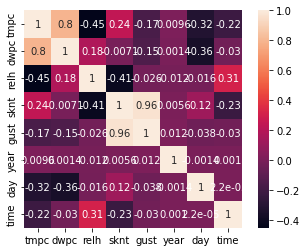

In [21]:
sns.heatmap(dataset.corr(), annot=True, square=True)

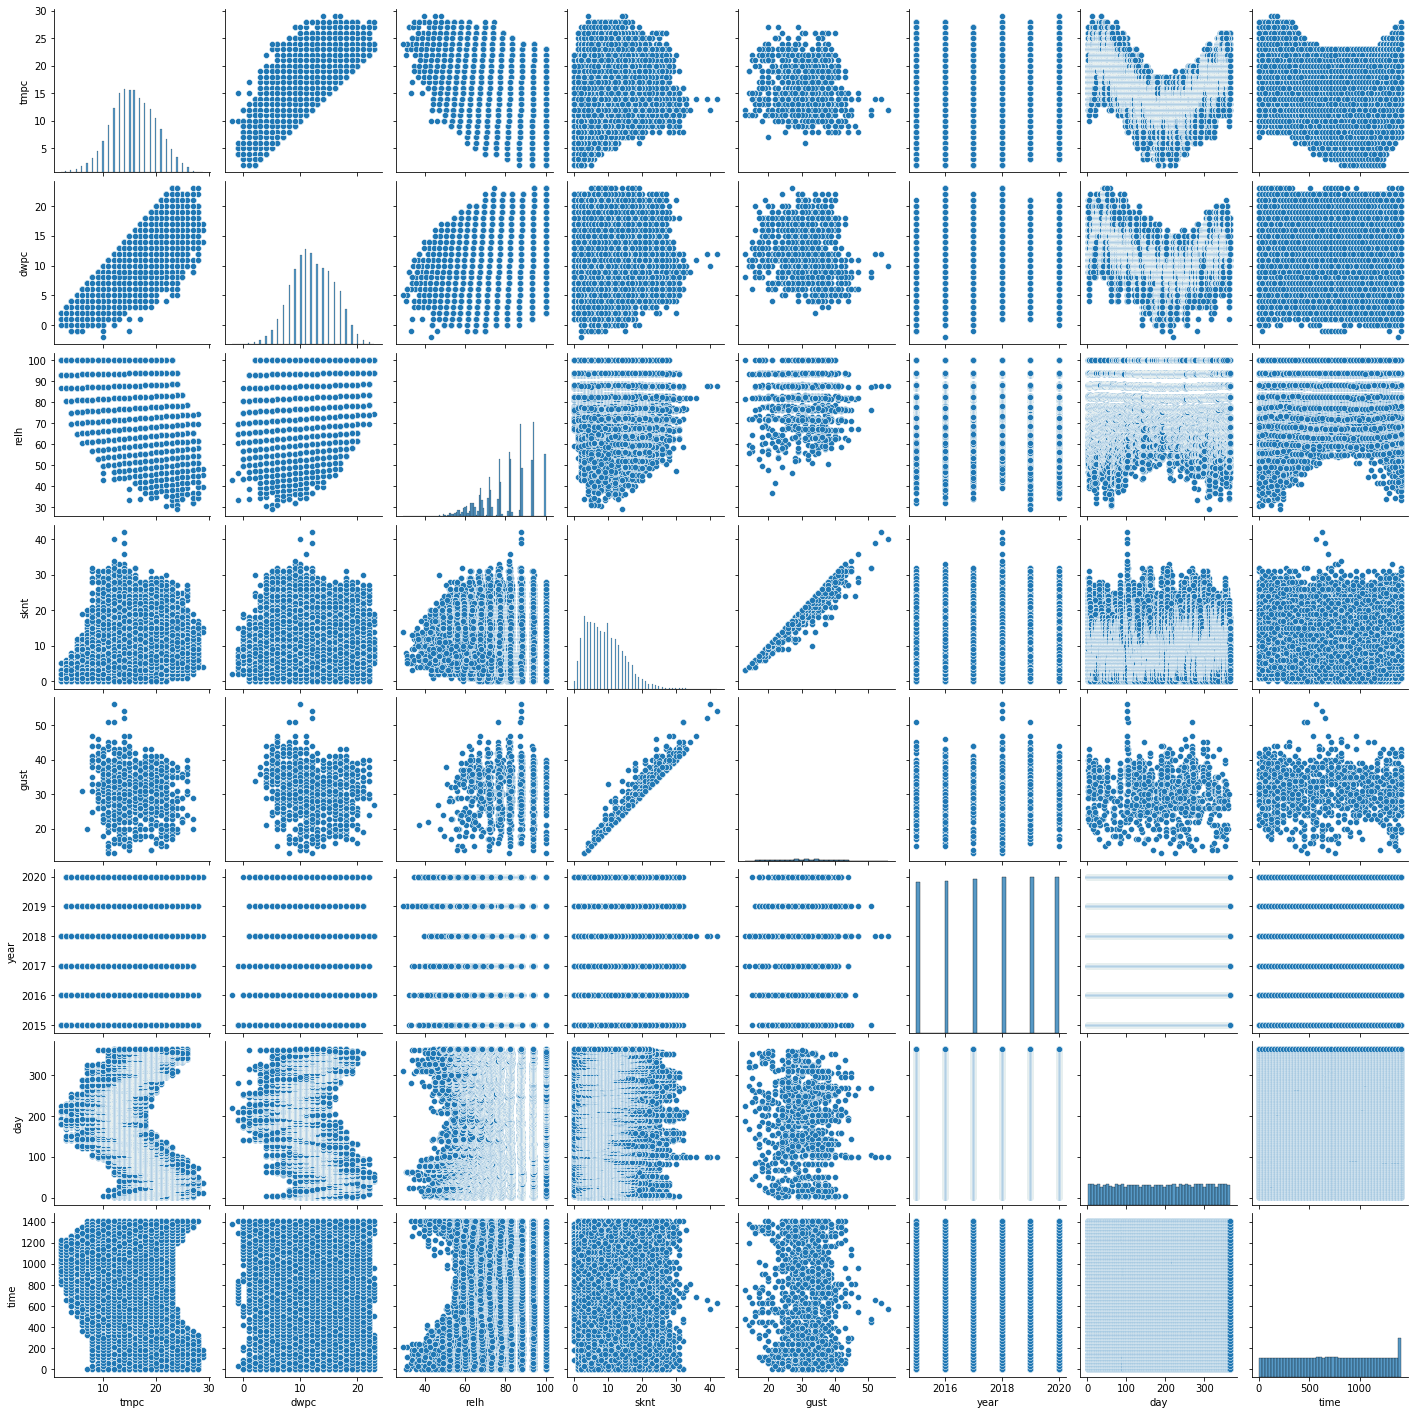

In [22]:
sns.pairplot(dataset )

ignoring the relationships between weather data and themselves and time and themselves can indeed see some kind of cyclic relationship through each days and each year while there seems to be a similar range of each year in the data.

We're gonna map  day time against the weather data.
first we're gonna simplify the data by only taking one value per unique day

In [23]:
df2 = dataset.drop(dataset[dataset.time != 0].index)

df2 = df2.drop('time', axis=1)
df2.head()


,tmpc,dwpc,relh,sknt,gust,year,day
0,21.0,11.0,52.77,15.0,NaN,2015,1
48,22.0,14.0,60.44,9.0,NaN,2015,2
96,20.0,15.0,72.92,11.0,NaN,2015,3
144,24.0,17.0,64.91,6.0,NaN,2015,4
192,22.0,17.0,73.27,9.0,NaN,2015,5


In [24]:
df2015 = df2.drop(df2[df2.year != 2015].index)
df2016 = df2.drop(df2[df2.year != 2016].index)
df2017 = df2.drop(df2[df2.year != 2017].index)
df2018 = df2.drop(df2[df2.year != 2018].index)
df2019 = df2.drop(df2[df2.year != 2019].index)
df2020 = df2.drop(df2[df2.year != 2020].index)

We havecreated a new dataframe where the it isonly the times at midnight so we drop time and create separate dataframes for each year

In [25]:
df2015["day"]

0          1
48         2
96         3
144        4
192        5
        ... 
16731    362
16779    363
16827    364
16875    365
16923    366
Name: day, Length: 350, dtype: int64

<AxesSubplot:xlabel='day'>

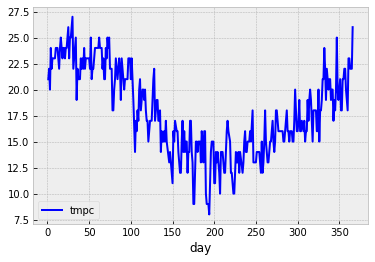

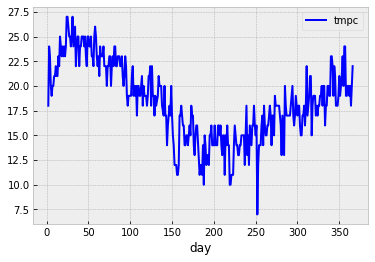

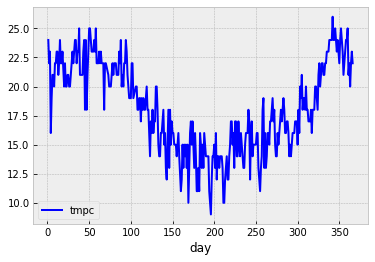

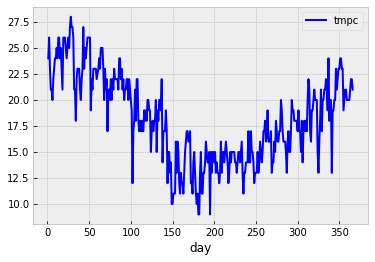

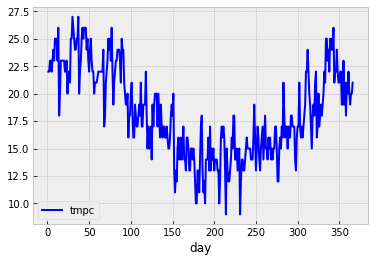

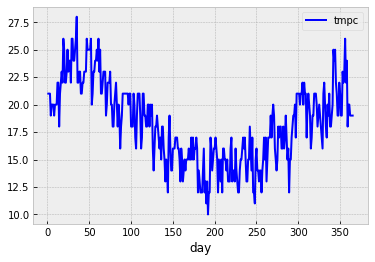

In [27]:
# Example multiple graph plots.

plt.style.use("bmh")
df2015.plot(x="day", y="tmpc", color="blue")
df2016.plot(x="day", y="tmpc", color="blue")
df2017.plot(x="day", y="tmpc", color="blue")
df2018.plot(x="day", y="tmpc", color="blue")
df2019.plot(x="day", y="tmpc", color="blue")
df2020.plot(x="day", y="tmpc", color="blue")






<AxesSubplot:xlabel='day'>

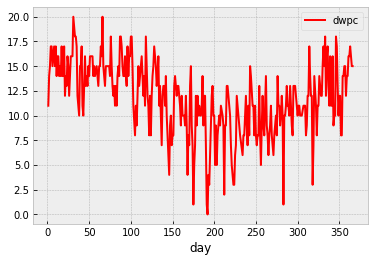

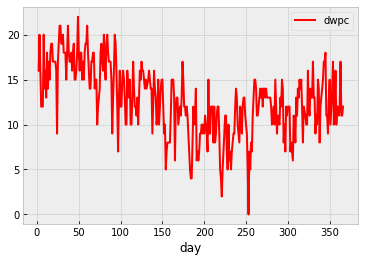

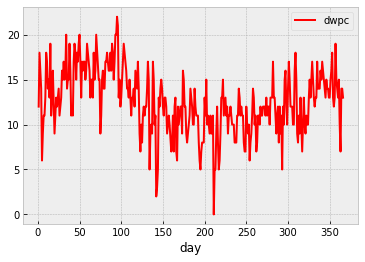

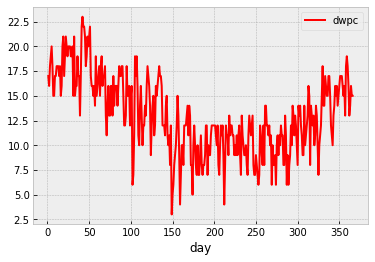

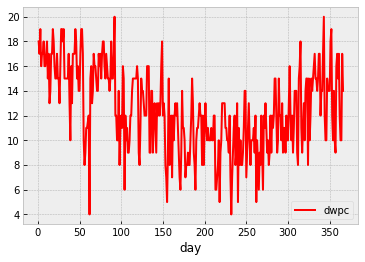

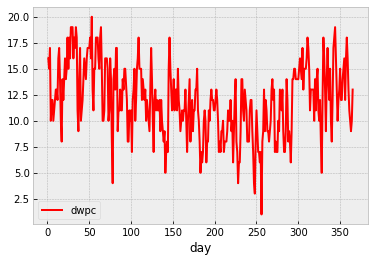

In [28]:
plt.style.use("bmh")
df2015.plot(x="day", y="dwpc", color="red")
df2016.plot(x="day", y="dwpc", color="red")
df2017.plot(x="day", y="dwpc", color="red")
df2018.plot(x="day", y="dwpc", color="red")
df2019.plot(x="day", y="dwpc", color="red")
df2020.plot(x="day", y="dwpc", color="red")





<AxesSubplot:xlabel='day'>

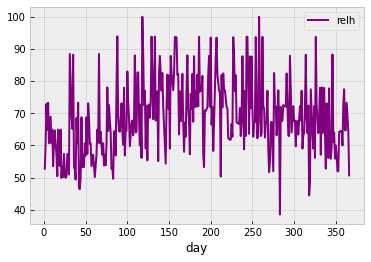

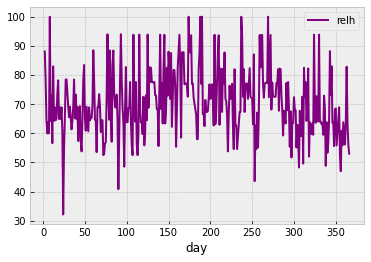

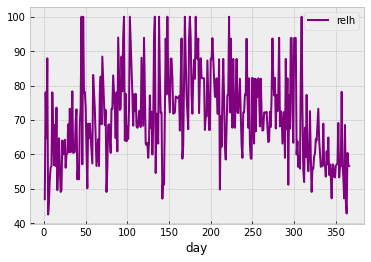

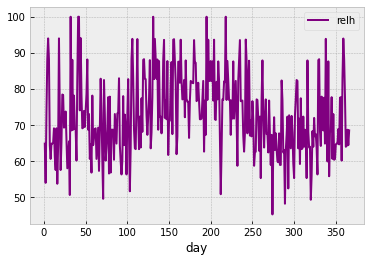

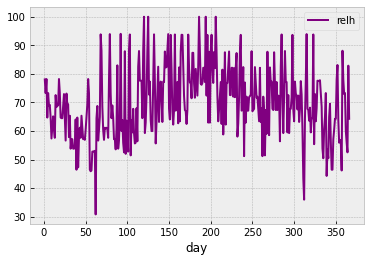

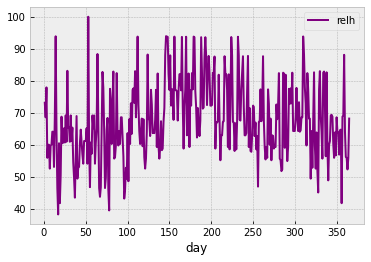

In [29]:
plt.style.use("bmh")
df2015.plot(x="day", y="relh", color="purple")
df2016.plot(x="day", y="relh", color="purple")
df2017.plot(x="day",y="relh", color="purple")
df2018.plot(x="day", y="relh", color="purple")
df2019.plot(x="day",y="relh", color="purple")
df2020.plot(x="day", y="relh", color="purple")





<AxesSubplot:xlabel='day'>

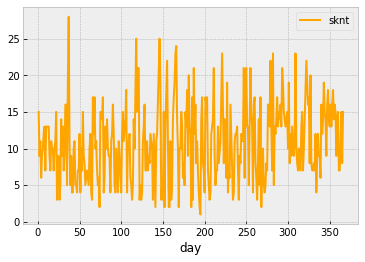

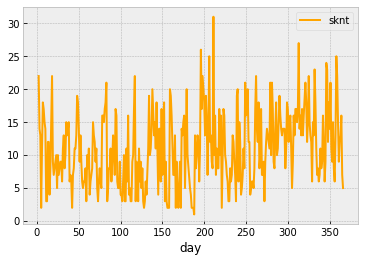

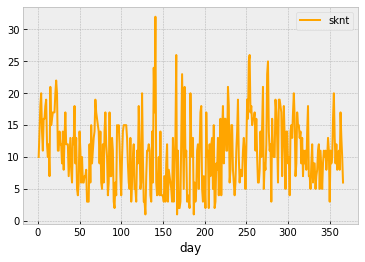

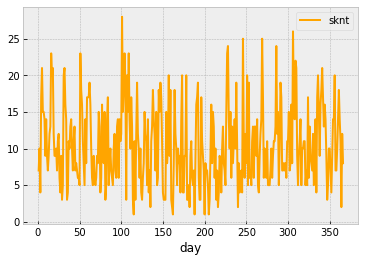

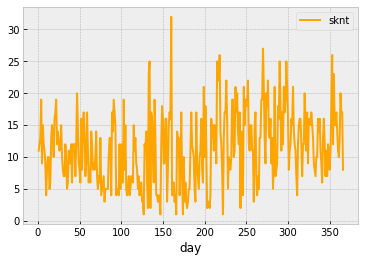

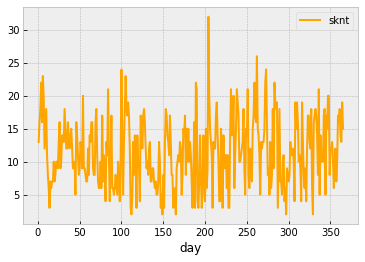

In [30]:
plt.style.use("bmh")
df2015.plot(x="day", y="sknt", color="orange")
df2016.plot(x="day", y="sknt", color="orange")
df2017.plot(x="day", y="sknt", color="orange")
df2018.plot(x="day", y="sknt", color="orange")
df2019.plot(x="day", y="sknt", color="orange")
df2020.plot(x="day", y="sknt", color="orange")





There does seem to be a general pattern for each measurement across years but also a large amount of variance.

# Data Processing

first we will drop the gust column as well because there is too many Nan

In [31]:
dataset = dataset.drop('gust', axis=1)


In [32]:
dataset.head()

,tmpc,dwpc,relh,sknt,year,day,time
0,21.0,11.0,52.77,15.0,2015,1,0
1,21.0,10.0,49.37,16.0,2015,1,30
2,21.0,12.0,56.38,16.0,2015,1,60
3,21.0,13.0,60.21,16.0,2015,1,90
4,21.0,12.0,56.38,16.0,2015,1,120


Then we will drop all rows with at least one empty value

In [33]:
dataset = dataset.dropna()

In [34]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103584 entries, 0 to 103712
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   tmpc    103584 non-null  float64
 1   dwpc    103584 non-null  float64
 2   relh    103584 non-null  float64
 3   sknt    103584 non-null  float64
 4   year    103584 non-null  int64  
 5   day     103584 non-null  int64  
 6   time    103584 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 6.3 MB
None


Then we will make a train and test set.
The below model will try to predict weather data dased on date

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(dataset[["year", "day","time"]], dataset[["tmpc","dwpc","relh","sknt"]], test_size=0.2)

In [37]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82867 entries, 76295 to 50294
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    82867 non-null  int64
 1   day     82867 non-null  int64
 2   time    82867 non-null  int64
dtypes: int64(3)
memory usage: 2.5 MB


In [38]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20717 entries, 35923 to 78432
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    20717 non-null  int64
 1   day     20717 non-null  int64
 2   time    20717 non-null  int64
dtypes: int64(3)
memory usage: 647.4 KB


In [39]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82867 entries, 76295 to 50294
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmpc    82867 non-null  float64
 1   dwpc    82867 non-null  float64
 2   relh    82867 non-null  float64
 3   sknt    82867 non-null  float64
dtypes: float64(4)
memory usage: 3.2 MB


In [40]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20717 entries, 35923 to 78432
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmpc    20717 non-null  float64
 1   dwpc    20717 non-null  float64
 2   relh    20717 non-null  float64
 3   sknt    20717 non-null  float64
dtypes: float64(4)
memory usage: 809.3 KB


# Data Modelling

We can use a linear regression model because this is a relationship between discrete dates and continuous weather values. 

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [42]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [43]:

model.score(x_test, y_test)

0.10860379013456356

We can see that the model scored very bad, some other regression model may be needed. This is because linear regression may expect a relationship value based purely linearly and a prediction of weather based only on the future date and past results is not very great.

In [44]:
model.coef_

array([[ 2.20204265e-02, -1.26673906e-02, -2.24378509e-03],
       [-5.91568907e-05, -1.25689044e-02, -2.62343511e-04],
       [-9.29943732e-02, -2.15352701e-03,  9.47755689e-03],
       [ 8.30460760e-03,  6.04444391e-03, -2.93848823e-03]])

Now we can use this model to predict weather values based on future dates

In [45]:
print(model.predict([[2022,1,0]]))

[[19.8125994  14.59186307 73.0318816   9.90847685]]


c:\users\timot\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [64]:
model2 = KNeighborsRegressor(n_neighbors=10)
model2.fit(x_train, y_train)
model2.score(x_test, y_test)


0.45060777394682094

In [65]:
print(model2.predict([[2022,1,0]]))

[[22.    15.    65.259 13.9  ]]


c:\users\timot\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


Trying the nearest neighbors model which the data points closest to the target and predicts using those, it seems fitting to use it in this case because data points close to one another tend to be quite similar.

we can use this to predict the weather data for the next month of 2022

In [83]:
for x in range (32):
    print(x,model2.predict([[2022,x,0]]))     

0 [[22.2   15.6   67.066 13.7  ]]
1 [[22.    15.    65.259 13.9  ]]
2 [[21.6   15.    66.558 15.2  ]]
3 [[21.6   15.    66.558 15.2  ]]
4 [[21.1   14.3   65.494 16.6  ]]
5 [[20.7   14.    66.216 18.2  ]]
6 [[20.8   13.3   62.426 17.1  ]]
7 [[20.9   12.9   60.307 16.1  ]]
8 [[21.5   13.6   60.832 14.3  ]]
9 [[22.1   14.2   60.944 12.9  ]]
10 [[22.4   14.5   61.014 11.6  ]]
11 [[23.2   15.5   61.989 10.2  ]]
12 [[23.5   16.    62.841  9.7  ]]
13 [[23.3   15.4   61.457  9.3  ]]
14 [[23.4   14.8   59.253  9.3  ]]
15 [[23.    14.8   60.913  9.4  ]]
16 [[22.7   14.2   60.031 10.2  ]]
17 [[22.8  13.8  58.16  9.6 ]]
18 [[23.  14.  58.2  9.4]]
19 [[23.    13.8   57.372 10.1  ]]
20 [[23.1   14.3   58.796 10.5  ]]
21 [[23.    14.8   60.501 11.6  ]]
22 [[22.8   14.9   61.749 12.3  ]]
23 [[22.7   15.9   65.859 12.   ]]
24 [[22.7  15.8  65.22 12.  ]]
25 [[23.4   16.7   66.227 11.1  ]]
26 [[24.    17.3   66.337 10.8  ]]
27 [[24.9   17.7   64.549 10.5  ]]
28 [[25.5   17.7   62.127 10.1  ]]
29 [[25.6  

c:\users\timot\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\users\timot\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\users\timot\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\users\timot\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\users\timot\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, b

# Conclusion



We took weather data and tried to build a model to predict based on only the date.Removing columns and rows that did not have sufficient data and converting all data into either floats or integers allowed the use of an appropriate machine learning model.From the plots a general pattern of weather data can be seen across a year however with high variance. The data was taken and split into training and testing with the input being only the date the info was taken and the output being tmpc,dwpc, relh and sknt.

A linear regression model was tried but that resulted in a poor model. This may because as shown from the plots, although there is a general pattern, variance is high and the pattern is not necessarily linear. An alternative model was tried using the nearest neighbour model which takes the n closest values to the particular data point and uses that to predict the future.
This result in a better model but still not great. This is because using only the date to predict weather data is unreliable and although there is a general pattern for time to weather data, there is too much variance for a reilable model. It may be better to use a model that also takes the previous days weather data as an input which would better allow it to predict the future.